importing Jupyter notebook from knn.ipynb
importing Jupyter notebook from naive_bayes.ipynb


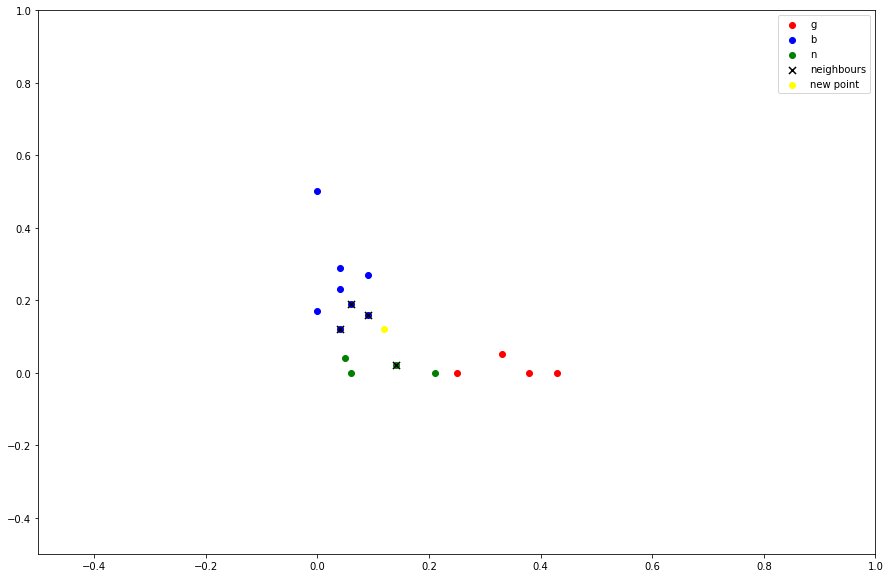

In [1]:
import import_ipynb
import word_score
from knn import *
from naive_bayes import *
analysis={}

In [2]:
import csv
data=[]
c_mat={}
with open("test_set.csv") as csv_file:
        reader=csv.reader(csv_file)
        next(reader)
        for row in reader: 
            data.append(row)
            
data

[['1', 'It was very good', 'g'],
 ['2', 'it was okay.', 'n'],
 ['3', 'It was not good.', 'b'],
 ['4', 'It was perfect.', 'g'],
 ['5', 'It was better.', 'g'],
 ['6', ' uncool', 'b']]

In [3]:
size=0
def accuracy(c_mat):
    accuracy=0
    total=len(c_mat)
    
    for i in c_mat:
        if c_mat[i]['expected']==c_mat[i]['predicted']:
            accuracy+=1
    return round(float(accuracy/total),2)

def recall(c_mat):
    recall=0
    recall_list=[]
    classes=set([row[2] for row in data[:size]])
    for c in classes:
        c_count=0
        tp_count=0
        for i in c_mat:
            if c_mat[i]['expected']==c:
                c_count+=1
                if c_mat[i]['expected']==c_mat[i]['predicted']:
                    tp_count+=1
        print("recall for ",c," :",round(float(tp_count/c_count),2))
        recall_list.append(round(float(tp_count/c_count),2))
    recall=round(float(sum(recall_list)/len(recall_list)),2)
    return recall
                
def analysis(algo):
    for row in data[:size]:
        
        key=int(row[0])
        c_mat[key]={'expected':row[2],'predicted':None}
        text=row[1]
        score=word_score.get_tuple(text)
        if algo=='knn':
            output=knn(4,score)
        elif algo=='nb':
            output=nb(score)
        c_mat[key]['predicted']=output
    print(c_mat)
    print(c_mat,accuracy(c_mat),recall(c_mat))
    
    
    

In [4]:
size=2

In [5]:
%%time
analysis("knn")


{1: {'expected': 'g', 'predicted': 'g'}, 2: {'expected': 'n', 'predicted': 'g'}}
recall for  g  : 1.0
recall for  n  : 0.0
{1: {'expected': 'g', 'predicted': 'g'}, 2: {'expected': 'n', 'predicted': 'g'}} 0.5 0.5
CPU times: user 0 ns, sys: 2.84 ms, total: 2.84 ms
Wall time: 6.29 ms


In [6]:
%%time
analysis('nb')



{1: {'expected': 'g', 'predicted': 'n'}, 2: {'expected': 'n', 'predicted': 'n'}}
recall for  g  : 0.0
recall for  n  : 1.0
{1: {'expected': 'g', 'predicted': 'n'}, 2: {'expected': 'n', 'predicted': 'n'}} 0.5 0.5
CPU times: user 1.17 ms, sys: 687 µs, total: 1.86 ms
Wall time: 2.28 ms
